#### **Importing Required Libraries**

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2

#### **Function to Plot Image Gallery**

In [2]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#### **Load and Preprocess Face Images**

In [3]:
dir_name = r"C:/Users/USER/Desktop/Face_Recognition/faces/"
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    dir_path = dir_name + person_name + "/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = dir_path + image_name
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)
    person_id += 1

y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]

print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

Number of samples: 450
Number of features: 90000


#### **Split the Dataset into Training and Testing Sets**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

#### **Extract Principal Components using PCA**

In [5]:
n_components = 150
print(f"Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces")
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 337 faces


#### **Plot the most significant eigenfaces**

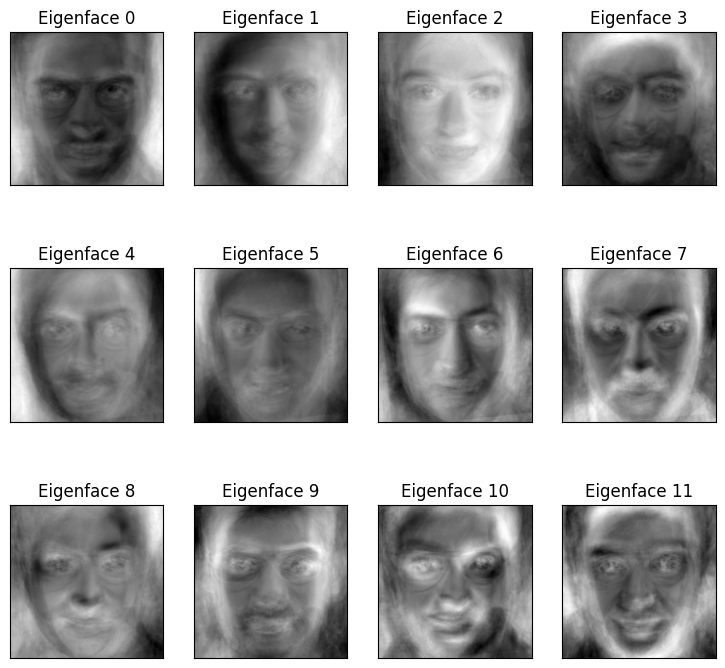

In [6]:
eigenface_titles = [f"Eigenface {i}" for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

#### **Project the input data on the PCA basis**

In [7]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### **Applying Linear Discriminant Analysis**

In [8]:
lda = LDA()
lda.fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

#### **Training a Neural Network Classifier**

In [10]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True)
clf.fit(X_train_lda, y_train)

Iteration 1, loss = 3.00516169
Iteration 2, loss = 2.95084886
Iteration 3, loss = 2.89814431
Iteration 4, loss = 2.84228733
Iteration 5, loss = 2.79413331
Iteration 6, loss = 2.74437378
Iteration 7, loss = 2.69597278
Iteration 8, loss = 2.64954442
Iteration 9, loss = 2.60443590
Iteration 10, loss = 2.56126711
Iteration 11, loss = 2.51855924
Iteration 12, loss = 2.47807733
Iteration 13, loss = 2.43942939
Iteration 14, loss = 2.40171825
Iteration 15, loss = 2.36464642
Iteration 16, loss = 2.32969540
Iteration 17, loss = 2.29426265
Iteration 18, loss = 2.25993325
Iteration 19, loss = 2.22743544
Iteration 20, loss = 2.19346768
Iteration 21, loss = 2.16170233
Iteration 22, loss = 2.12940640
Iteration 23, loss = 2.09912241
Iteration 24, loss = 2.06777121
Iteration 25, loss = 2.03615174
Iteration 26, loss = 2.00782976
Iteration 27, loss = 1.97665350
Iteration 28, loss = 1.95006603
Iteration 29, loss = 1.92209045
Iteration 30, loss = 1.89487323
Iteration 31, loss = 1.86759909
Iteration 32, los

,hidden_layer_sizes,"(10, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,1


#### **Inspecting Model Weights**

In [11]:
model_info = [coef.shape for coef in clf.coefs_]
print("Model weights:", model_info)

Model weights: [(8, 10), (10, 10), (10, 9)]


#### **Making Predictions on Test Data**

In [12]:
y_pred = []
y_prob = []
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.argmax(prob)
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

#### **Convert predictions to numpy array**

In [13]:
y_pred = np.array(y_pred)

#### **Evaluate Model Predictions and Calculate Accuracy**

In [15]:
true_positive = 0
prediction_titles = []
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = f'Pred: {pred_name}, Pr: {str(y_prob[i])[:3]} \nTrue: {true_name}'
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1
accuracy = true_positive * 100 / y_pred.shape[0]
print(f"Accuracy: {accuracy}")

Accuracy: 65.48672566371681


#### **Visualizing Test Faces with Predictions**

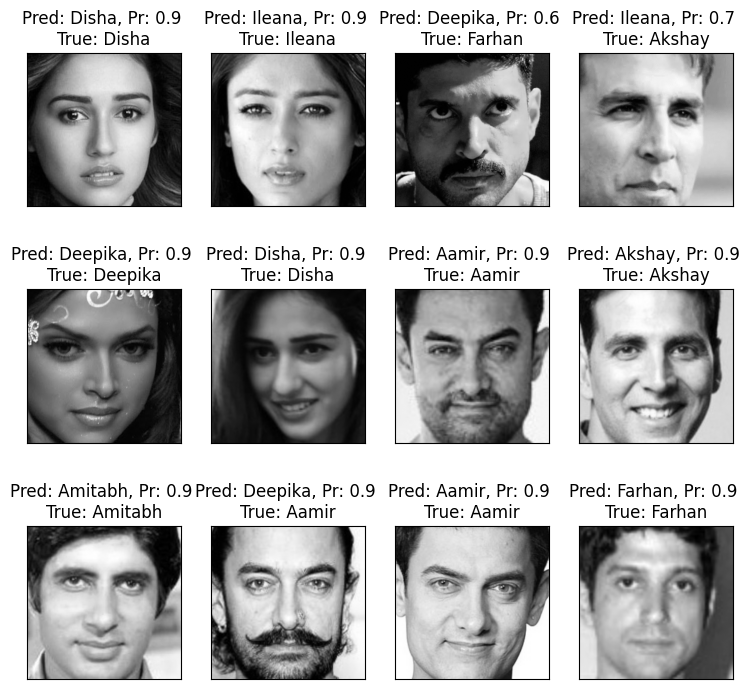

In [16]:
plot_gallery(X_test, prediction_titles, h, w)
plt.show()